In [23]:
# Set up environment
%matplotlib inline
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Read in our data

customer_churn = pd.read_csv("Telco-Customer-Churn.csv")


In [2]:
# Get to know the data a bit

customer_churn.info()

customer_churn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_churn['TotalCharges'] = pd.to_numeric(customer_churn['TotalCharges'], errors='coerce')

In [4]:
#split our dataset into two: those who churned and those who did not

churn_yes = customer_churn[(customer_churn['Churn'] == 'Yes')]
churn_yes.info()

churn_no = customer_churn[(customer_churn['Churn'] == 'No')]
churn_no.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 2 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1869 non-null   object 
 1   gender            1869 non-null   object 
 2   SeniorCitizen     1869 non-null   int64  
 3   Partner           1869 non-null   object 
 4   Dependents        1869 non-null   object 
 5   tenure            1869 non-null   int64  
 6   PhoneService      1869 non-null   object 
 7   MultipleLines     1869 non-null   object 
 8   InternetService   1869 non-null   object 
 9   OnlineSecurity    1869 non-null   object 
 10  OnlineBackup      1869 non-null   object 
 11  DeviceProtection  1869 non-null   object 
 12  TechSupport       1869 non-null   object 
 13  StreamingTV       1869 non-null   object 
 14  StreamingMovies   1869 non-null   object 
 15  Contract          1869 non-null   object 
 16  PaperlessBilling  1869 non-null   object 


In [5]:
customer_churn['TotalCharges'] = pd.to_numeric(customer_churn['TotalCharges'], errors='coerce')

In [12]:
customer_churn['TotalCharges'].isnull().values.any()

True

In [13]:
customer_churn['TotalCharges'].dropna(inplace=True)

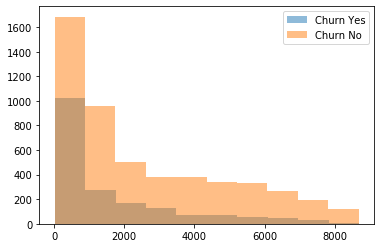

In [18]:
plt.hist(churn_yes['TotalCharges'], alpha = .5, label = 'Churn Yes')
plt.hist(churn_no['TotalCharges'], alpha = .5, label = 'Churn No')
plt.legend()
plt.show()

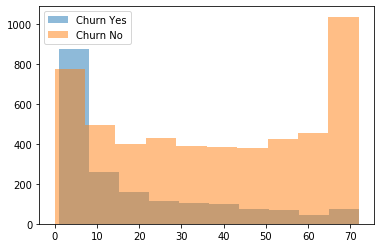

In [22]:
plt.hist(churn_yes['tenure'], alpha = .5, label = 'Churn Yes')
plt.hist(churn_no['tenure'], alpha = .5, label = 'Churn No')
plt.legend()
plt.show()